# Algo - graphes aléatoires

Comment générer un graphe aléatoire.

In [1]:
%matplotlib inline

In [2]:
import numpy

mat = numpy.random.random((15, 15))
mat = mat + mat.T
adja = (mat >= 1.4).astype(int)
for i in range(adja.shape[0]):
    adja[i ,i] = 0
adja

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

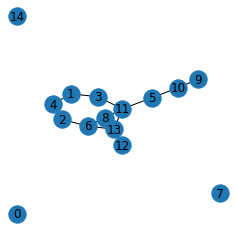

In [3]:
import networkx
import matplotlib.pyplot as plt
fix, ax = plt.subplots(1, 1,figsize=(4,4))
G = networkx.from_numpy_matrix(adja)  
networkx.draw(G, with_labels=True, ax=ax) 

In [4]:
degres = adja.sum(axis=1)
degres

array([0, 2, 2, 2, 2, 2, 3, 0, 2, 1, 2, 4, 1, 3, 0])

In [5]:
distrib = {}
for d in degres:
    if d in distrib:
        distrib[d] += 1
    else:
        distrib[d] = 1
distrib

{0: 3, 2: 7, 3: 2, 1: 2, 4: 1}

On calcule $A + A^2 + A^3 + ... + A^n$ où n est la dimension de la matrice.

In [6]:
adjan = adja.copy()
conne = numpy.zeros(adja.shape)
for i in range(1, adja.shape[0]):
    conne += adjan
    adjan = adjan @ adja
(conne > 0).astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [7]:
C = numpy.arange(adja.shape[0])
maj = 1
while maj > 0:
    maj = 0
    for i in range(adja.shape[0]):
        for j in range(i + 1, adja.shape[1]):
            if adja[i, j] > 0 and C[i] != C[j]:
                maj += 1
                C[i] = C[j] = min(C[i], C[j])
                
C

array([ 0,  1,  1,  1,  1,  1,  1,  7,  1,  1,  1,  1,  1,  1, 14])

[Graphes aléatoires](http://perso.ens-lyon.fr/eric.thierry/Graphes2007/thomas-braibant.pdf), [Les modèles de graphes théoriques](https://halshs.archives-ouvertes.fr/halshs-00773006/document),

[algorithme graphe aléatoire](http://www.proba.jussieu.fr/pageperso/rebafka/BookGraphes/graphes-scale-free.html)

[cours](https://www-complexnetworks.lip6.fr/~magnien/SDR/cours4.pdf)